In [182]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [184]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.csv')

In [186]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [188]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [190]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


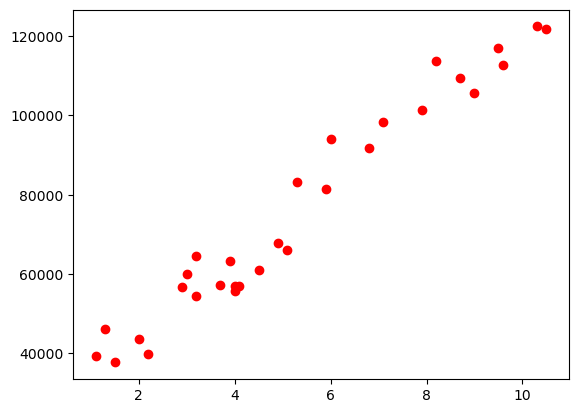

In [192]:
# These Plots help to explain the values and how they are scattered

# Plot a scatter plot 
plt.scatter(data['YearsExperience'],data['Salary'],color='red')

In [194]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [196]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [240]:
# Split the data for train and test (70% for training)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=0)

In [242]:
X_train=(X_train.values).reshape(-1,1)
X_test=(X_test.values).reshape(-1,1)


In [244]:
y_train

22    101302.0
5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [246]:
y_train=y_train.values.ravel()


In [248]:
type(y_train)

numpy.ndarray

In [250]:
# Create new axis for x column

#X_train = X_train[:,np.newaxis]
#X_test = X_test[:,np.newaxis]

In [252]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [254]:
# Fitting the model
regressor=LinearRegression()


In [256]:
print(X_train.shape)
y_train.shape

(21, 1)


(21,)

In [258]:
print(y_train)
X_train


[101302.  56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.
  60150.  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.
  98273.  67938.  56957.]


array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [260]:
regressor.fit(X_train,y_train)

LinearRegression()

In [270]:
# Predicting the Salary for the Test values
y_predected=regressor.predict(X_test)
y_predected

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

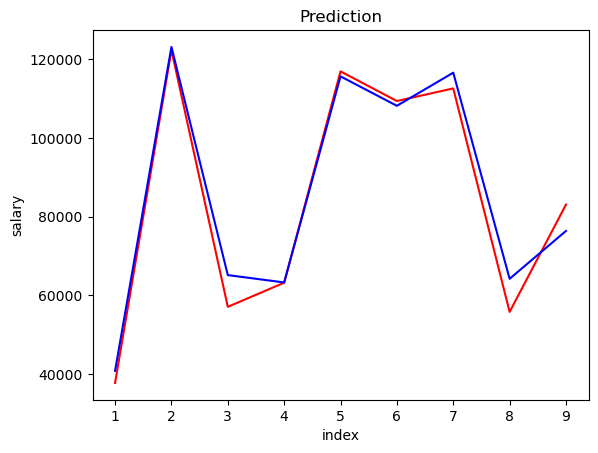

In [286]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_predected,color='b',linestyle='-')
plt.xlabel('index')
plt.ylabel('salary')
plt.title('Prediction')
plt.show()

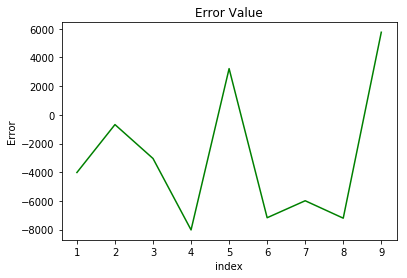

In [16]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [290]:
# Importing r2_score and mean_squared_error for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error


In [302]:
# calculate Mean square error
MSE=mean_squared_error(y_test,y_predected)

In [314]:
# Calculate R square vale
R2=r2_score(y_test,y_predected)

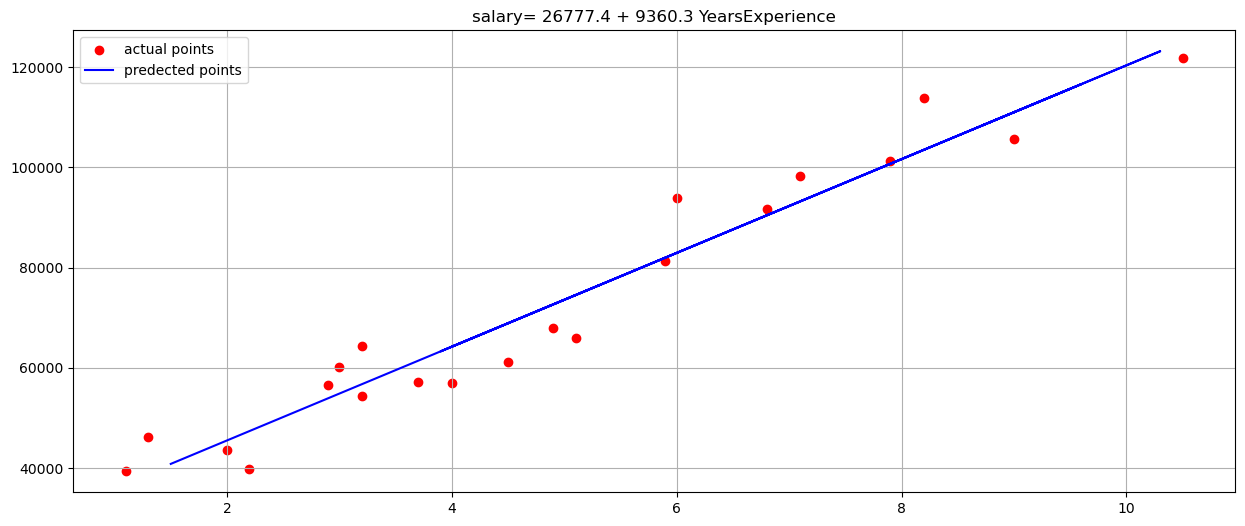

In [378]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(15,6))
plt.scatter(X_train,y_train,color='r')
plt.plot(X_test,y_predected,'b')
plt.title(f'salary= {round(regressor.intercept_,1)} + {round(regressor.coef_[0],1)} YearsExperience')
plt.legend(['actual points','predected points'],loc='upper left')
plt.grid()
plt.show()

In [380]:
# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: 26777.391341197632
Coefficient of the line: [9360.26128619]


In [382]:
print(f'salary= {round(regressor.intercept_,1)} + {round(regressor.coef_[0],1)} YearsExperience')

salary= 26777.4 + 9360.3 YearsExperience


![](http://)Then it is said to form a line with
# y = 25202.8 + 9731.2x